#### Q1 
Create the following activation functions and estimate the score of different values of the input 'x' .
plot the distribution of its activation values and also its derivatives values in a chart
Linear or Identity Function f(x)=x
Step Funtion f(x)=1 or 0 { 1 if x>=0 else 0}
Sigmoid Function f(x)=1/(1+e^-x)
tanh Function tanh(x)=(e^x-e^-x)/(e^x+e^-x)
Relu Function f(x)=max(0,x)
Softmax Function f(X)=e^x/sum(e^x)

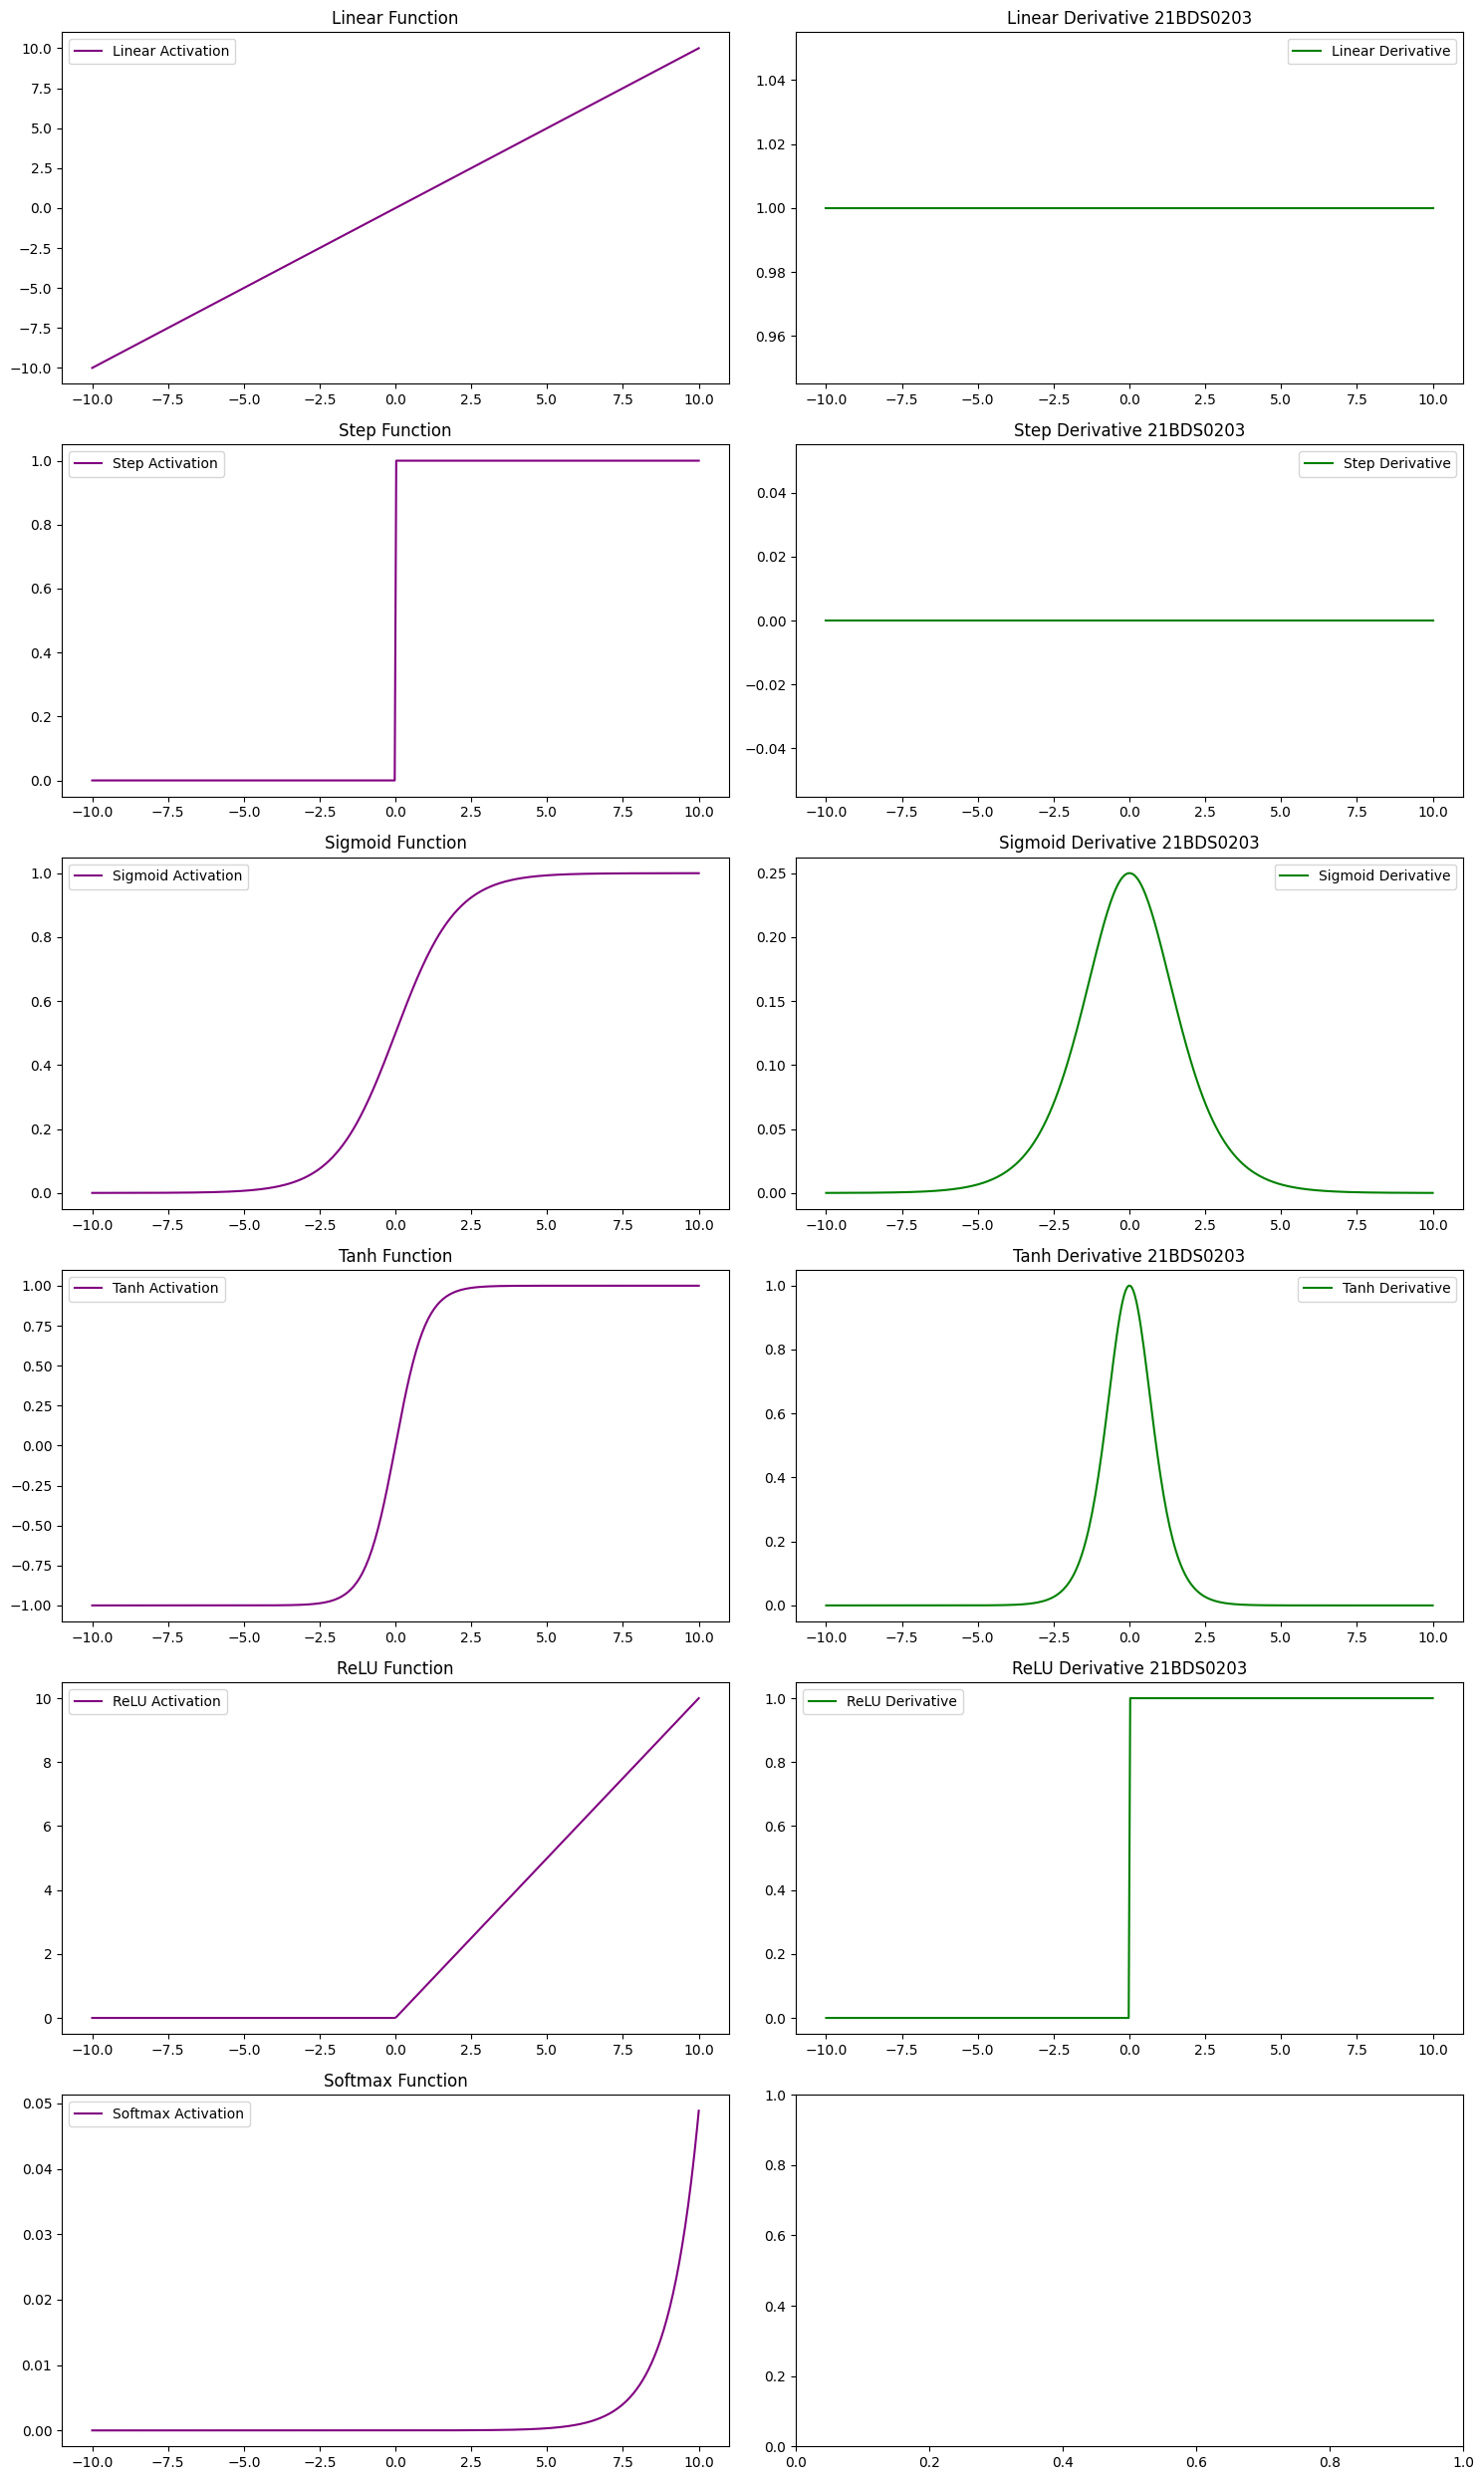

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation functions and their derivatives
def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

def step(x):
    return np.where(x >= 0, 1, 0)

def step_derivative(x):
    return np.zeros_like(x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x)) 
    return exp_x / np.sum(exp_x)

x = np.linspace(-10, 10, 400)

fig, axes = plt.subplots(6, 2, figsize=(15, 25))
activation_functions = [
    ("Linear", linear, linear_derivative),
    ("Step", step, step_derivative),
    ("Sigmoid", sigmoid, sigmoid_derivative),
    ("Tanh", tanh, tanh_derivative),
    ("ReLU", relu, relu_derivative),
    ("Softmax", softmax, None)  # Softmax does not have a direct derivative that can be plotted in the same way
]

for i, (name, func, derivative) in enumerate(activation_functions):
    ax1, ax2 = axes[i]
    y = func(x)
    ax1.plot(x, y, label=f'{name} Activation', color = 'purple')
    ax1.set_title(f'{name} Function')
    ax1.legend()
    ax1.grid(False)

    if derivative is not None:
        dy = derivative(x)
        ax2.plot(x, dy, label=f'{name} Derivative', color='green')
        ax2.set_title(f'{name} Derivative 21BDS0203')
        ax2.legend()
        ax2.grid(False)
plt.tight_layout()
plt.show()

#### Q2 
Implement a Multi Layer Feedback network for predicting the price of the house. Consider a housing price data CSV file consist of 13 input features and 1 output feature that is ‘price’.
Construct a neural network and perform the following tasks
a. Load and pre-process the dataset
b. Visulaize the distribution of price amount of the dataset using frequency plot
c. Split the dataset into Training and Testing
d. Define a Neural Network using Numpy (do not use any other framework such as Karas or Pytorch)
e. Train the data and build the neural network model
f. Evaluate on Testset
g. Calculate the Mean Squared Error and visualize the result

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


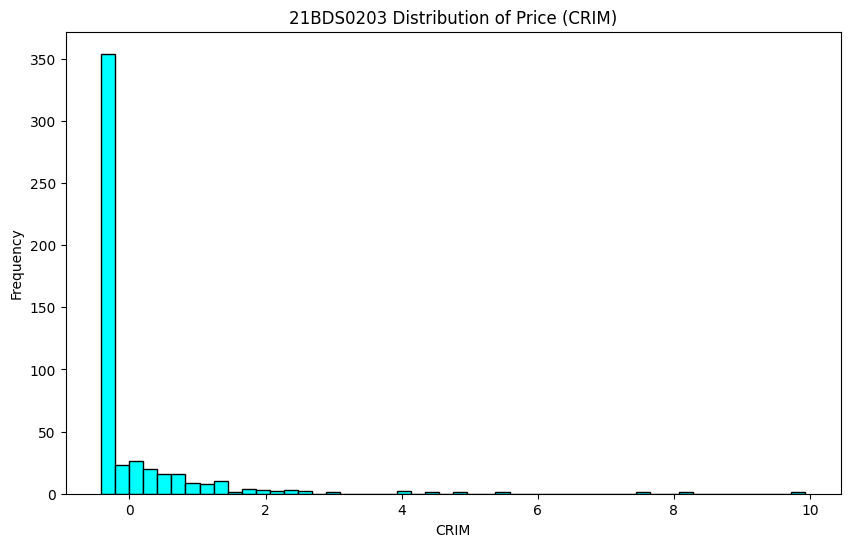

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and pre-process the dataset
df = pd.read_csv('housing.csv')
print(df.head())

X = df.drop('CRIM', axis=1).values
y = df['CRIM'].values

X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = (y - np.mean(y)) / np.std(y)

# Visulaize the distribution of price amount of the dataset using frequency plot
plt.figure(figsize=(10, 6))
plt.hist(y, bins=50, color='cyan', edgecolor='black')
plt.title('21BDS0203 Distribution of Price (CRIM)')
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Split the dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a Neural Network using Numpy
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return (x > 0).astype(float)
    
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        return self.Z2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        self.dZ2 = self.Z2 - y.reshape(-1, 1)
        self.dW2 = np.dot(self.A1.T, self.dZ2) / m
        self.db2 = np.sum(self.dZ2, axis=0, keepdims=True) / m
        
        self.dA1 = np.dot(self.dZ2, self.W2.T)
        self.dZ1 = self.dA1 * self.relu_derivative(self.Z1)
        self.dW1 = np.dot(X.T, self.dZ1) / m
        self.db1 = np.sum(self.dZ1, axis=0, keepdims=True) / m
        
        # Update weights and biases
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
    
    def train(self, X_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            self.forward(X_train)
            # Backward pass
            self.backward(X_train, y_train, learning_rate)
            if (epoch + 1) % 100 == 0:
                loss = np.mean((self.forward(X_train) - y_train.reshape(-1, 1))**2)
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

    def predict(self, X):
        return self.forward(X)

# Train the data and build the neural network model
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X_train, y_train, epochs=500, learning_rate=0.01)

# Evaluate on Testset
y_pred = nn.predict(X_test)

Epoch 100/500, Loss: 1.0455519048626671
Epoch 200/500, Loss: 0.9624384040357958
Epoch 300/500, Loss: 0.7613520383958273
Epoch 400/500, Loss: 0.6506911097207246
Epoch 500/500, Loss: 0.6186954840263582


Mean Squared Error: 0.3173499333542877


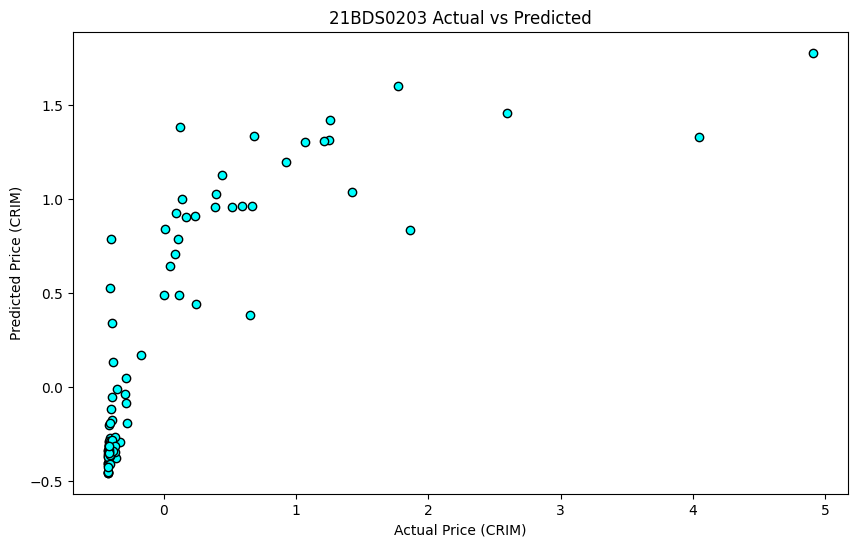

In [5]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error and visualize the result
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='cyan', edgecolor='black')
plt.title('21BDS0203 Actual vs Predicted')
plt.xlabel('Actual Price (CRIM)')
plt.ylabel('Predicted Price (CRIM)')
plt.show()

#### Q3 
Construct a neural network ( Multi-Layer Feed forward Network) to classify 3 species of iris.
The classification is based on 4 measurement predictor variables: sepal length & width, and petal length & width in the given dataset
The Neural Network will be built from scratch using pre-trained weights and biases. Hence, we will only be doing the forward (i.e., prediction) pass.
Load the iris dataset from sklearn standard datasets.
Assign the predictor and response variables appropriately.
One hot encode the categorical labels of the predictor variable.
Load and inspect the pre-trained weights and biases.
Construct the MLP:
Augment X with a column of ones to create the augmented design matrix X
Create the first layer weight matrix by vertically stacking the bias vector on top of the weight vector
Perform the affine transformation
Activate the output of the affine transformation using ReLU
Repeat the first 3 steps for the hidden layer (augment, vertical stack, affine)
Use softmax on the final layer
Finally, predict y

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

W1 = np.array([[0.2, 0.4, 0.6, 0.8], [0.5, 0.7, 0.9, 0.3], [0.8, 0.2, 0.4, 0.6]])
b1 = np.array([[0.1], [0.2], [0.3]])
W2 = np.array([[0.4, 0.5, 0.6], [0.7, 0.8, 0.9], [0.3, 0.2, 0.1]])
b2 = np.array([[0.2], [0.4], [0.6]])

# ReLU Activation Function
def relu(Z):
    return np.maximum(0, Z)

# Softmax Activation Function
def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=1, keepdims=True)

# Forward Pass
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1.T) + b1.T
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2.T) + b2.T
    A2 = softmax(Z2)
    return A2

def predict(X, W1, b1, W2, b2):
    A2 = forward_pass(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

y_pred = predict(X, W1, b1, W2, b2)
acc = accuracy(y.flatten(), y_pred)
print(f"Accuracy: {acc}%") #Low due to basic neural network created from scratch

Accuracy: 33.33333333333333%


In [7]:
# User input prediction
def predict_user_input(W1, b1, W2, b2):
    sepal_length = float(input("Enter sepal length: "))
    sepal_width = float(input("Enter sepal width: "))
    petal_length = float(input("Enter petal length: "))
    petal_width = float(input("Enter petal width: "))
    
    user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = predict(user_input, W1, b1, W2, b2)
    
    species = iris.target_names[prediction][0]
    print(f"Predicted species: {species}")

predict_user_input(W1, b1, W2, b2)

Enter sepal length:  3
Enter sepal width:  1
Enter petal length:  1
Enter petal width:  0.2


Predicted species: versicolor


#### Q4 
Consider the following x (input) and y(output) and implement
Gradient descent algorithm with 3 mode of selection indvidualy
a.Batch Gradient Descent
b.Stochastic Gradient Descent
c.Mini-batch Gradient Descent where batch-size=b with b<6 and b>1
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])
Visualize all the errors using a single plot

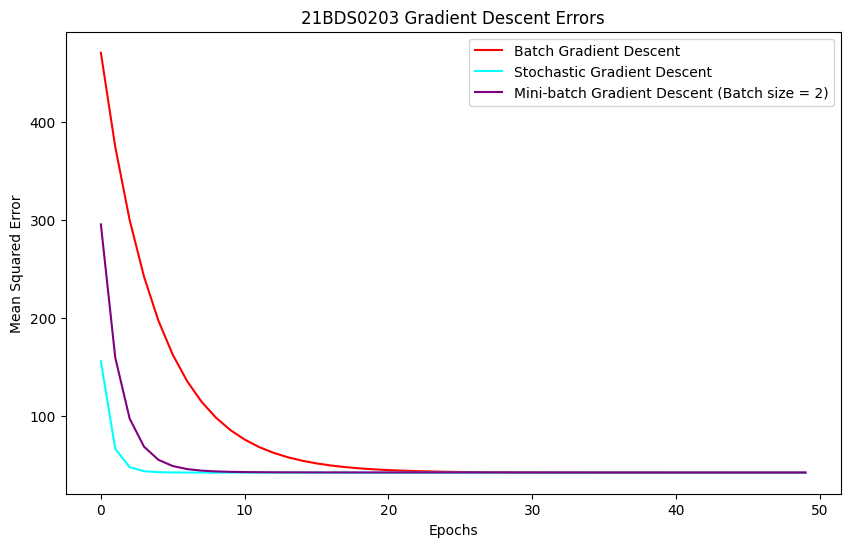

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

m = len(x)
theta0, theta1 = 0, 0 
alpha = 0.0001
epochs = 50

batch_errors = []
stochastic_errors = []
mini_batch_errors = []

def compute_mse(x, y, theta0, theta1):
    predictions = theta0 + theta1 * x
    return np.mean((predictions - y) ** 2)

# Batch Gradient Descent
for epoch in range(epochs):
    predictions = theta0 + theta1 * x
    d_theta0 = np.mean(predictions - y)
    d_theta1 = np.mean((predictions - y) * x)
    theta0 -= alpha * d_theta0
    theta1 -= alpha * d_theta1
    batch_errors.append(compute_mse(x, y, theta0, theta1))

theta0, theta1 = 0, 0

# Stochastic Gradient Descent
for epoch in range(epochs):
    for i in range(m):
        prediction = theta0 + theta1 * x[i]
        d_theta0 = prediction - y[i]
        d_theta1 = (prediction - y[i]) * x[i]
        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
    stochastic_errors.append(compute_mse(x, y, theta0, theta1))

theta0, theta1 = 0, 0

# Mini-batch Gradient Descent
batch_size = 2
for epoch in range(epochs):
    for i in range(0, m, batch_size):
        x_batch = x[i:i + batch_size]
        y_batch = y[i:i + batch_size]
        predictions = theta0 + theta1 * x_batch
        d_theta0 = np.mean(predictions - y_batch)
        d_theta1 = np.mean((predictions - y_batch) * x_batch)
        theta0 -= alpha * d_theta0
        theta1 -= alpha * d_theta1
    mini_batch_errors.append(compute_mse(x, y, theta0, theta1))

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(batch_errors, label='Batch Gradient Descent', color='red')
plt.plot(stochastic_errors, label='Stochastic Gradient Descent', color='cyan')
plt.plot(mini_batch_errors, label='Mini-batch Gradient Descent (Batch size = 2)',color='purple')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('21BDS0203 Gradient Descent Errors')
plt.legend()
plt.show()

#### Q5
Conduct an experiment using Multi Layer Perceptron with gradient descent and infer the result of Loss vs Epoch with respect to different learning rate using any of your sample data(X,Y).

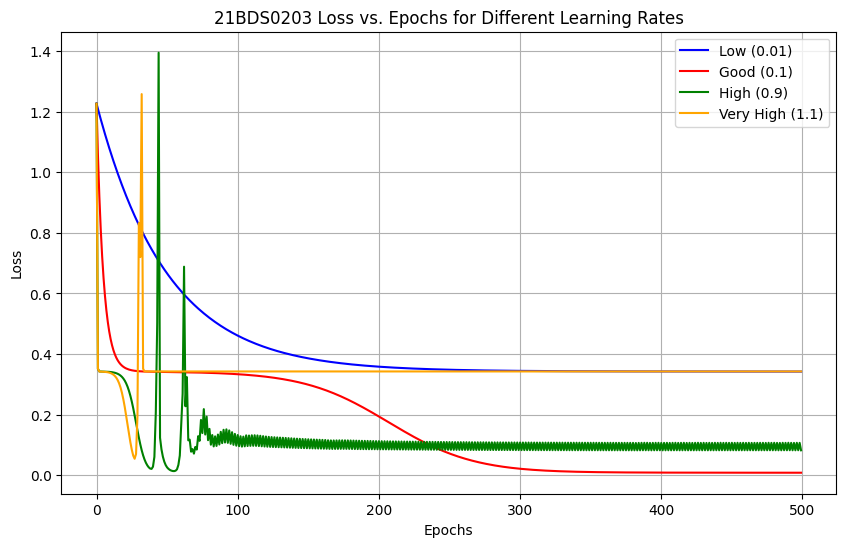

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(1, 100)
Y = 2 * X + np.random.randn(1, 100) * 0.1  # Linear relation with some noise

def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2 
    return Z1, A1, Z2, A2

def compute_loss(Y, A2):
    return np.mean((A2 - Y) ** 2)

# Backpropagation
def back_propagation(X, Y, Z1, A1, A2, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def train(X, Y, hidden_size, learning_rate, epochs):
    input_size = X.shape[0]
    output_size = 1
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    losses = []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        loss = compute_loss(Y, A2)
        losses.append(loss)
        dW1, db1, dW2, db2 = back_propagation(X, Y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    return losses

learning_rates = [0.01, 0.1, 0.9, 1.1]
colors = ['blue', 'red', 'green', 'orange']
labels = ['Low (0.01)', 'Good (0.1)', 'High (0.9)', 'Very High (1.1)']

plt.figure(figsize=(10, 6))
epochs = 500
hidden_size = 10

for lr, color, label in zip(learning_rates, colors, labels):
    losses = train(X, Y, hidden_size, lr, epochs)
    plt.plot(range(epochs), losses, color=color, label=label)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('21BDS0203 Loss vs. Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()